# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
from scipy import stats
import statsmodels
import statsmodels.stats.weightstats
import seaborn as sns

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


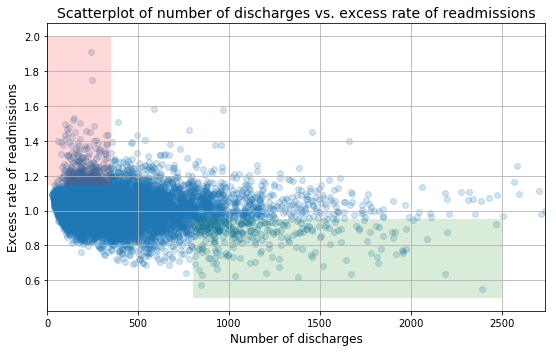

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
       
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.
You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [15]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


#### A. Do you agree with the above analysis and recommendations? Why or why not?

I disagree with the analysis above for several reasons:
* The analysis doesn't include actual sample sizes, significance testing or actual correlation, which makes it hard to accept their conclusion that the correlation between excess admission rate and discharges really is significant.
* The analysis doesn't mention any other variables or reasons that might be involved in the difference in excess admission rate. Beyond just fewer resources in smaller hospitals, it's also possible that smaller hospitals serve communities with different demographics and health profiles (e.g. older, more rural, poorer) than the large hospitals.  The recommendation in the conclusion does not feel supported at all.  In order to make a recommendation, the analysis would need to look into possible other factors at play.
* The populations compared in the Statistics section don't align with the recommendation or the graph.  In the Statistics section they compare hospitals with fewer than 100 discharges to hospitals with more than 1,000, then based on that make a recommendation for hosptials with fewer than 300 discharges.


#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Setup an appropriate hypothesis test.

##### Null Hypothesis: The excess rate of readmissions is the same for small hospitals with < 300 capacity as for large hospitals with > 300 capacity: P1 - P2 = 0
Alternate Hypothesis: The excess rate of readmissions is HIGHER for small hospitals with < 300 capacity than it is for large hospitals with > 300 capacity: P1 - P2 > 0

#### 2. Compute and report the observed significance value (or p-value).

In [80]:
# Defining the population of small hospitals (P1)
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 300]
small_pop = len(small)
small_mean = small['Excess Readmission Ratio'].mean() 
small_std = small['Excess Readmission Ratio'].std() 

# Defining the population of large hospitals (P2)
big = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 300]
big_pop = len(big)
big_mean = big['Excess Readmission Ratio'].mean()
big_std = big['Excess Readmission Ratio'].std()

# Difference of means (P1 - P2)
mean = small_mean - big_mean
mean

0.014367364156993245

In [77]:
# Standard Deviation of the differences in the means
std = ((small_std**2)/small_pop + (big_std**2)/big_pop)**(1/2.0)
std

0.0017310453253226762

In [81]:
# Test statistic score
mean / std

8.299819737137785

#### 3. Report statistical significance for $\alpha$ = .01. 

In [82]:
# Z Score for one-tailed test for alpha = .01 is 2.326.  99% confidence interval:
mean - 2.32*std, mean + 2.32*std

(0.010351339002244636, 0.018383389311741855)

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Based on the above analysis, we are 99% confident that the small hospitals (<300 discharges) have a significantly higher readmission rate than big hospitals, and thus we reject the null hypothesis.  However, while there does appear to be a significantly higher readmission rate among smaller hospitals, we should consider practical significance and solutions.  My recommendation to the client is:
* Continue exploring other confounding variables that might be causing a higher readmission rate among smaller hospitals, particularly the demographics of the patients and the types of diseases being treated.
* Look into the reasons why patients were readmitted to understand trends that could be affecting the rate.
* While properly resourcing hospitals is always a good thing, don't penalize small hospitals by shutting them down or consolidating hospitals based on readmission rates alone.  There could be many other factors at play that aren't in the hospital's control.

#### 5. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

A scatterplot is a helpful way to view a population and check for trends.  However, the original scatterplot doesn't definitively display a correlation, as it doesn't show the regression line and R-squared value.  In the below scatterplot, I included the regression line so we can see the trendline in the data, and the coefficient of determination.  With an R-squared value of .0095, the relationship between number of discharges and the excess readmission ratio is actually quite weak.

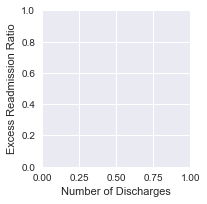

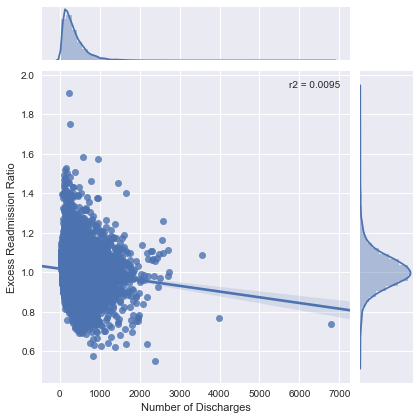

In [65]:
# Plotting a scatterplot with regression line and R-squared value

plot = sns.FacetGrid(clean_hospital_read_df, size=3)  
plot.map(sns.jointplot, 'Number of Discharges', 'Excess Readmission Ratio', kind="reg", stat_func=r2)

grid = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', clean_hospital_read_df, kind="reg")